# Fase e magnitude da transformada de Fourier

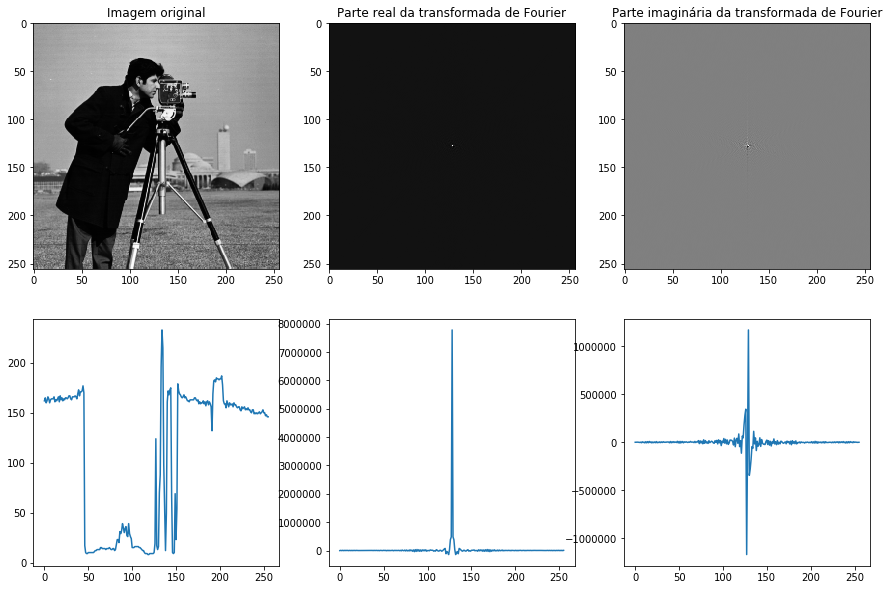

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift

img = plt.imread('cameraman.tiff')

num_rows, num_cols = img.shape
middle_row = int(num_rows/2)
Fimg = fft2(img)
Fimg = fftshift(Fimg)

Fimg_real = np.real(Fimg)
Fimg_imag = np.imag(Fimg)

plt.figure(figsize=[15, 10])
plt.subplot(2, 3, 1)
plt.imshow(img, 'gray')
plt.title('Imagem original')
plt.subplot(2, 3, 2)
plt.imshow(Fimg_real, 'gray')
plt.title('Parte real da transformada de Fourier')
plt.subplot(2, 3, 3)
plt.imshow(Fimg_imag, 'gray')
plt.title('Parte imaginária da transformada de Fourier')
plt.subplot(2, 3, 4)
plt.plot(img[128])
plt.subplot(2, 3, 5)
plt.plot(Fimg_real[middle_row])
plt.subplot(2, 3, 6)
plt.plot(Fimg_imag[middle_row])

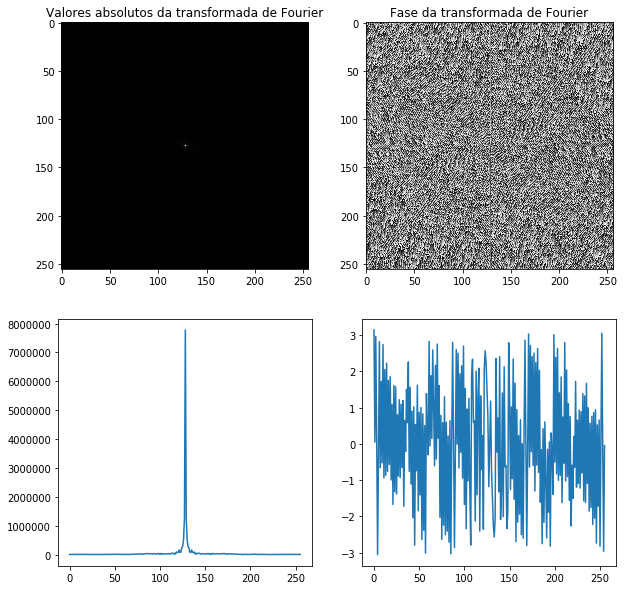

In [5]:
# Cálculo do valor absoluto da cada valor complexo contido
# na transformada de Fourier da imagem. Equivalente ao 
# comando img_abs = np.abs(Fimg)
img_abs = np.sqrt(Fimg_real**2 + Fimg_imag**2)

# Cáculo da fase (ângulo) de cada valor complexo contido
# na transformada de Fourier da imagem. Equivalente
# ao comando img_fase = np.angle(Fimg)
img_fase = np.arctan2(Fimg_imag, Fimg_real)

plt.figure(figsize=[10, 10])
plt.subplot(2, 2, 1)
plt.imshow(img_abs, 'gray')
plt.title('Valores absolutos da transformada de Fourier')
plt.subplot(2, 2, 2)
plt.imshow(img_fase, 'gray')
plt.title('Fase da transformada de Fourier')
plt.subplot(2, 2, 3)
plt.plot(img_abs[middle_row])
plt.subplot(2, 2, 4)
plt.plot(img_fase[middle_row])

#### Podemos tentar recuperar a imagem utilizando apenas os valores absolutos da transformada

Spoiler: não dá certo

Text(0.5,1,'Transformada inversa do valor absoluto')

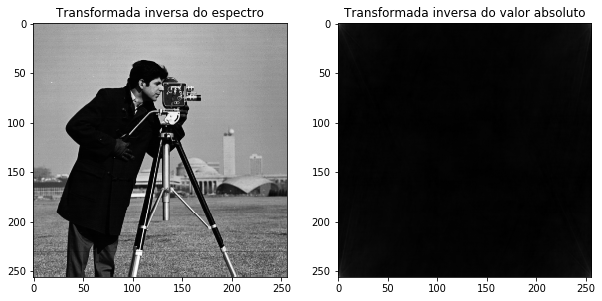

In [6]:
Fimg_shift = fftshift(Fimg)
img_abs_shift = fftshift(img_abs)
img_rec = np.real(ifft2(Fimg_shift))
img_abs_rec = np.real(ifft2(img_abs_shift))

plt.figure(figsize=[10, 10])
plt.subplot(1, 2, 1)
plt.imshow(img_rec, 'gray')
plt.title('Transformada inversa do espectro')
plt.subplot(1, 2, 2)
plt.imshow(img_abs_rec, 'gray')
plt.title('Transformada inversa do valor absoluto')